<a href="https://colab.research.google.com/github/vaibhavchoudhary10/SalaryPrediction/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Salary_Data.csv')

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


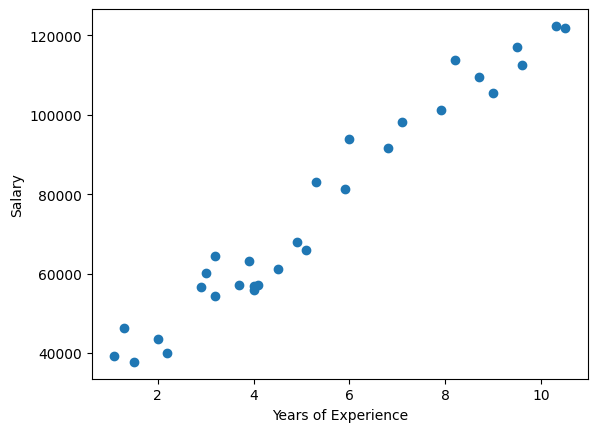

In [5]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=42)

In [11]:
x_train

array([[ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [12]:
y_train

array([ 39891.,  66029.,  56642.,  57081.,  55794., 101302.,  46205.,
        37731., 105582.,  43525.,  98273., 116969.,  81363., 121872.,
        91738.,  54445.,  63218.,  61111.,  93940.,  60150.])

In [13]:
x_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1]])

In [14]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [16]:
LR.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred_LR = LR.predict(x_test)

In [18]:
y_pred_LR

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [19]:
diff_LR = y_test - y_pred_LR

In [20]:
res_df = pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis = 1)
res_df.columns = ['Prediction', 'Original Data', 'Difference']

In [21]:
res_df

,Prediction,Original Data,Difference
0,115814.307562,112635.0,-3179.307562
1,71511.925348,67938.0,-3573.925348
2,102617.853286,113812.0,11194.146714
3,75282.340855,83088.0,7805.659145
4,55487.659440,64445.0,8957.340560
5,60200.678825,57189.0,-3011.678825
6,122412.534701,122391.0,-21.534701
7,107330.872670,109431.0,2100.127330
8,63028.490456,56957.0,-6071.490456
9,35692.978025,39343.0,3650.021975


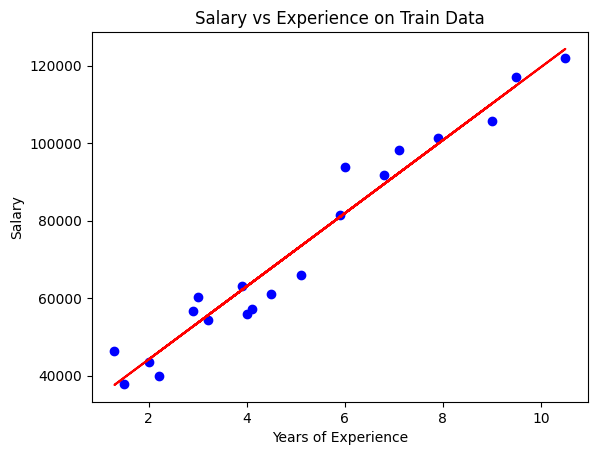

In [22]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('Salary vs Experience on Train Data')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

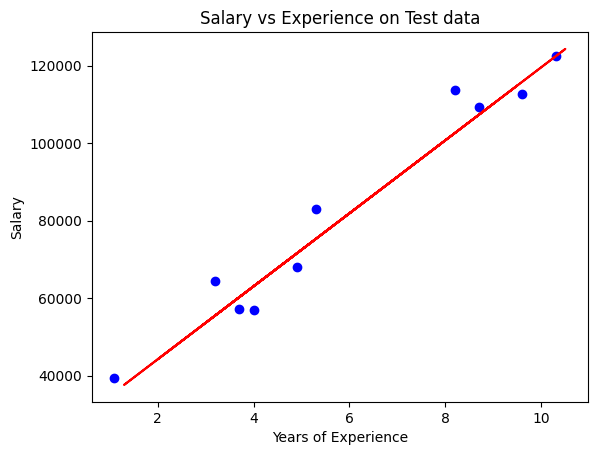

In [23]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('Salary vs Experience on Test data')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

#Metrics

In [24]:
from sklearn import metrics
rmse =(metrics.root_mean_squared_error(y_test,y_pred_LR))
R2 = metrics.r2_score(y_test,y_pred_LR)

In [25]:
rmse

5941.540110706558

In [26]:
R2

0.9553063138044949

In [27]:
LR.predict([[6]])

array([81880.56799369])

# Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
DT = DecisionTreeRegressor()

In [30]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [31]:
y_pred_dt = DT.predict(x_test)

In [32]:
y_pred_dt

array([116969.,  66029., 101302.,  66029.,  54445.,  63218., 121872.,
       105582.,  55794.,  46205.])

In [33]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

In [34]:
diff_DT=y_test-y_pred_dt
res_dt=pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']

In [35]:
res_dt

,Prediction,Original Data,Diff
0,116969.0,112635.0,-4334.0
1,66029.0,67938.0,1909.0
2,101302.0,113812.0,12510.0
3,66029.0,83088.0,17059.0
4,54445.0,64445.0,10000.0
5,63218.0,57189.0,-6029.0
6,121872.0,122391.0,519.0
7,105582.0,109431.0,3849.0
8,55794.0,56957.0,1163.0
9,46205.0,39343.0,-6862.0


In [36]:
x_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1]])

In [39]:
from sklearn import metrics
rmse= metrics.root_mean_squared_error(y_test,y_pred_dt)
R2=metrics.r2_score(y_test,y_pred_dt)

In [40]:
rmse

8184.1922875748705

In [41]:
R2

0.915199237395396

In [42]:
from sklearn import tree

In [43]:
text_representation = tree.export_text(DT)

In [45]:
print(text_representation)

|--- feature_0 <= 5.50
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.40
|   |   |   |--- value: [46205.00]
|   |   |--- feature_0 >  1.40
|   |   |   |--- feature_0 <= 1.75
|   |   |   |   |--- value: [37731.00]
|   |   |   |--- feature_0 >  1.75
|   |   |   |   |--- feature_0 <= 2.10
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |   |--- feature_0 >  2.10
|   |   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.80
|   |   |   |--- feature_0 <= 4.30
|   |   |   |   |--- feature_0 <= 3.95
|   |   |   |   |   |--- feature_0 <= 3.55
|   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |--- value: [54445.00]
|   |   |   |   |   |--- feature_0 >  3.55
|   |

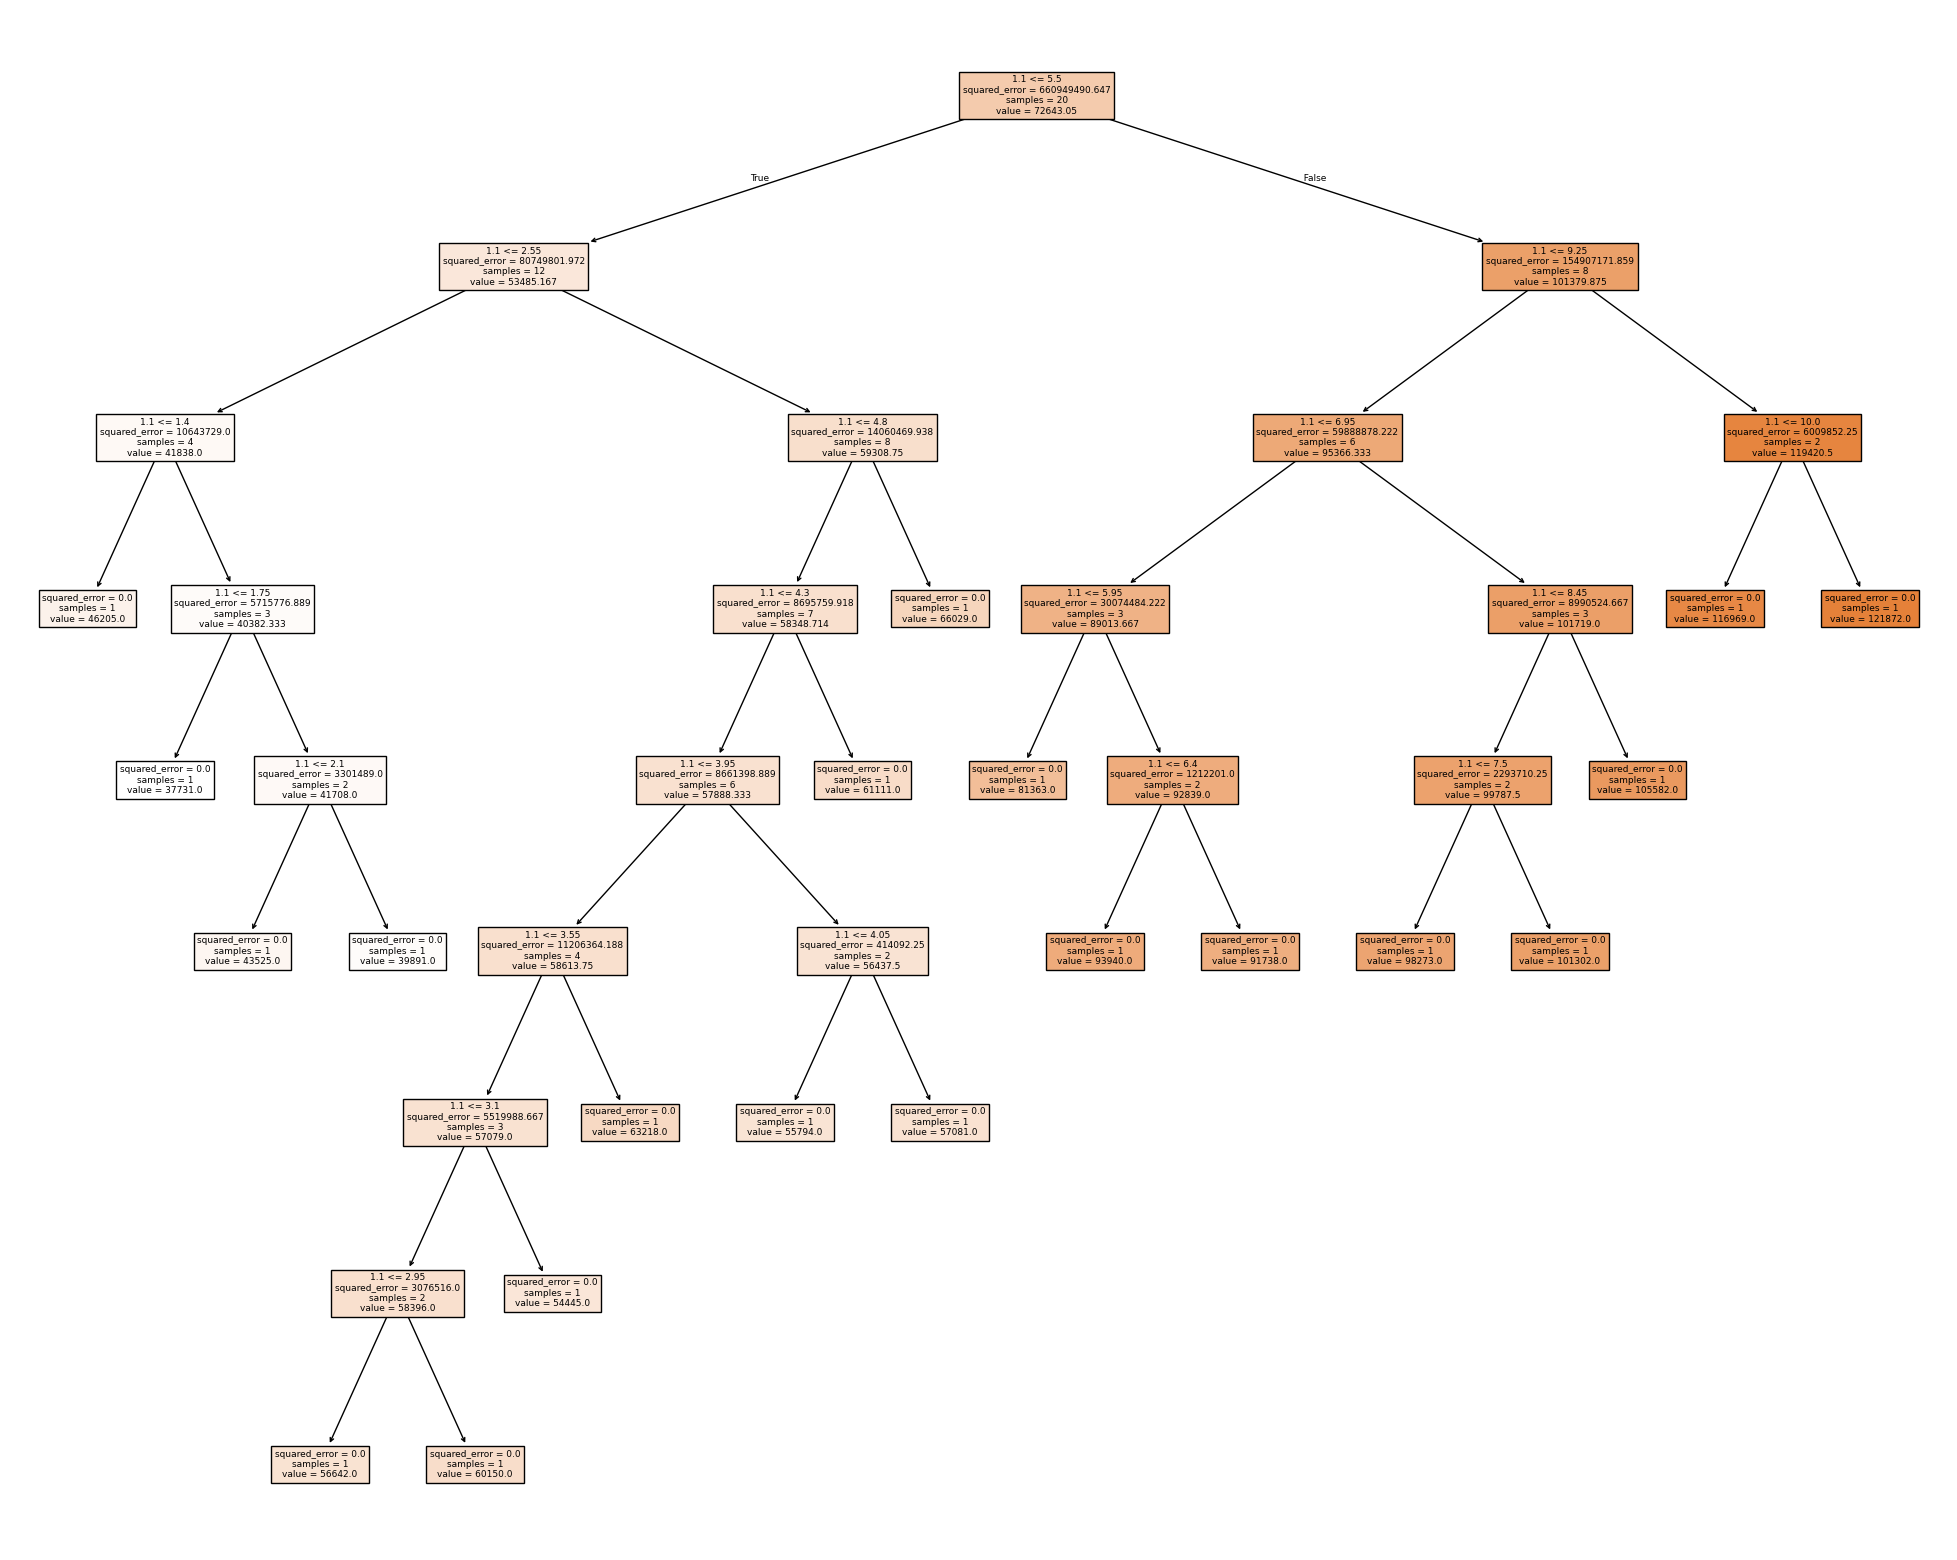

In [46]:
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(DT,feature_names=dataset['YearsExperience'], filled=True)